In [9]:
import random as r
import math

houses = [{'size': r.randint(100,300), 'cost': r.randint(3000000,20000000)} for x in range(15)]
houses

[{'size': 203, 'cost': 5219898},
 {'size': 121, 'cost': 9003011},
 {'size': 122, 'cost': 4627043},
 {'size': 115, 'cost': 4535687},
 {'size': 106, 'cost': 5799125},
 {'size': 290, 'cost': 18617970},
 {'size': 164, 'cost': 11174812},
 {'size': 275, 'cost': 5861695},
 {'size': 138, 'cost': 10474527},
 {'size': 179, 'cost': 3607218},
 {'size': 223, 'cost': 18168823},
 {'size': 189, 'cost': 17784804},
 {'size': 254, 'cost': 5048810},
 {'size': 201, 'cost': 7794779},
 {'size': 203, 'cost': 7434372}]

In [10]:
for house in houses:
    house['meter_cost'] = round(house['cost']/house['size'])

relevant_meter_cost = 50000
relevant = [house for house in houses if house['meter_cost'] <= relevant_meter_cost]
relevant

[{'size': 203, 'cost': 5219898, 'meter_cost': 25714},
 {'size': 122, 'cost': 4627043, 'meter_cost': 37927},
 {'size': 115, 'cost': 4535687, 'meter_cost': 39441},
 {'size': 275, 'cost': 5861695, 'meter_cost': 21315},
 {'size': 179, 'cost': 3607218, 'meter_cost': 20152},
 {'size': 254, 'cost': 5048810, 'meter_cost': 19877},
 {'size': 201, 'cost': 7794779, 'meter_cost': 38780},
 {'size': 203, 'cost': 7434372, 'meter_cost': 36623}]

In [13]:
relevant = sorted(relevant, key = lambda x: x['size'], reverse=True)
relevant

[{'size': 275, 'cost': 5861695, 'meter_cost': 21315},
 {'size': 254, 'cost': 5048810, 'meter_cost': 19877},
 {'size': 203, 'cost': 5219898, 'meter_cost': 25714},
 {'size': 203, 'cost': 7434372, 'meter_cost': 36623},
 {'size': 201, 'cost': 7794779, 'meter_cost': 38780},
 {'size': 179, 'cost': 3607218, 'meter_cost': 20152},
 {'size': 122, 'cost': 4627043, 'meter_cost': 37927},
 {'size': 115, 'cost': 4535687, 'meter_cost': 39441}]

In [41]:
import matplotlib.pyplot as plt
[(key,x['cost']) for key,x in enumerate(relevant)]

[(0, 5861695),
 (1, 5048810),
 (2, 5219898),
 (3, 7434372),
 (4, 7794779),
 (5, 3607218),
 (6, 4627043),
 (7, 4535687)]

5219898


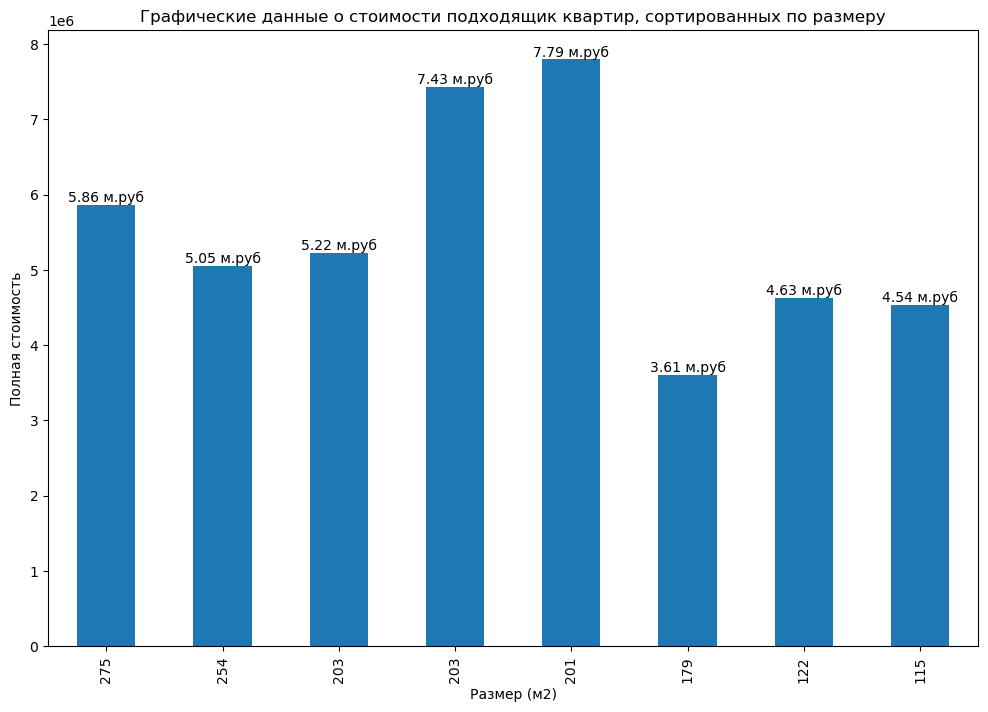

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


costs = [x['cost'] for x in relevant]

freq_series = pd.Series(costs)
print(freq_series[2])
x_labels = [x['size'] for x in relevant]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title('Графические данные о стоимости подходящик квартир, сортированных по размеру')
ax.set_xlabel('Размер (м2)')
ax.set_ylabel('Полная стоимость')
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = ['{} м.руб'.format(round(x/10000)/100) for x in costs]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()